# Universidad Nacional de Chimborazo

**Facultad:** Facultad de Ingeniería  
**Carrera:** Ciencia de Datos e IA  
**Materia:** Modelamiento  
**Docente:** Estalin Mejia H.  
**Semestre:** Tercero

---

## Trabajo Autónomo 3

### Analisis de Clasificación con Aprendizaje Supervisado: Predicción de Arrestos en Crímenes de Chicago

**Autores:**  
- Alisson Atupaña
- Mario Camacho
- Lenin Lopez

**Fecha:** 12 - 11 - 2025

**Riobamba - Ecuador**

---
**Descargar el dataset:** https://drive.google.com/file/d/1VP9iR1ScdQVeH7gJRVXq6E-Z_qOEiNhc/view

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(30,58,138,0.25); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📋</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">1. Introducción y Contexto del Problema</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">
            <strong>Objetivo:</strong> Desarrollar un random forest con el objetivo de predecir si un crimen resulta en arresto o no.<br><br>
            <strong>Dataset:</strong> Conjunto de datos que refleja los incidentes delictivos denunciados que ocurrieron en la ciudad de Chicago desde el 2001 hasta la actualidad. Cada registro incluye detalles como el tipo de crimen, la ubicación, la fecha y hora, y si el incidente resultó en un arresto.<br><br>
        </div>
    </div>
</div>

##
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">📦</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Instalación de Librerías</div>
    </div>
</div>

###
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ca8a04,#eab308); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(202,138,4,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">⚠️</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Advertencia:</div>
        <div style="opacity:0.85; font-size:0.8rem; margin-top:2px;">Las librerías solo se deben instalar la primera vez. Comentar esta celda después de la instalación.</div>
    </div>
</div>

In [1]:
install.packages(c("readr", "dplyr", "ggplot2", "caret", "ROSE", "lightgbm", 
                   "arrow", "rpart", "rpart.plot", "randomForest", "pROC", 
                   "gridExtra", "corrplot", "lubridate", "scales", "tidyr", "sf"), 
                 verbose = FALSE, quiet = TRUE)


  There is a binary version available but the source version is later:
   binary source needs_compilation
sf 1.0-21 1.0-22              TRUE

package 'readr' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'ROSE' successfully unpacked and MD5 sums checked
package 'lightgbm' successfully unpacked and MD5 sums checked
package 'arrow' successfully unpacked and MD5 sums checked
package 'rpart' successfully unpacked and MD5 sums checked
package 'rpart.plot' successfully unpacked and MD5 sums checked
package 'randomForest' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'corrplot' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
packa

installing the source package 'sf'


Warning message in install.packages(c("readr", "dplyr", "ggplot2", "caret", "ROSE", :
"installation of package 'sf' had non-zero exit status"


##
<div style="display:flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#ea580c,#f97316); padding:16px; border-radius:10px; box-shadow:0 6px 15px rgba(234,88,12,0.2); color:#fff; max-width:fit-content; width:min(850px,100%); margin:12px auto; margin-left:40px; box-sizing:border-box;">
    <div style="width:32px; height:32px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.45rem; line-height:1;">📚</div>
    <div>
        <div style="font-weight:800; font-size:1.35rem; letter-spacing:0.3px;">Carga de Librerías</div>
    </div>
</div>

In [2]:
library(dplyr)       
library(tidyr)      
library(ggplot2)     
library(caret)        
library(ROSE)       
library(lightgbm)     
library(arrow)       
library(rpart)     
library(rpart.plot)  
library(randomForest)
library(pROC)        
library(gridExtra)   
library(corrplot)   
library(lubridate)    
library(scales)
library(sf)


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Cargando paquete requerido: lattice

Loaded ROSE 0.0-4



Adjuntando el paquete: 'arrow'


The following object is masked from 'package:utils':

    timestamp


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Adjuntando el paquete: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Type 'citation("pROC")' for a citation.


Adjuntando el paquete: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var



Adjuntando el paquete: 'gridExtra'


The following object is masked from 'package:randomForest':

    combine


The following object is masked from 'package:dplyr':

    combine


corrplot 0.95 loaded


Adjuntando el paquete: 

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(34, 47, 8, 0.79); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📥</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">2. Carga y Exploración Inicial de Datos</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">Se cargara el dataset desde el archivo parquet y se realizara una exploracion inicial de los datos, se debe entender su estructura, dimensiones, tipos de datos y caracteristicas principales.</div>
    </div>
</div>

In [3]:
datos <- read_parquet("crimes.parquet")

In [4]:
# Mostrar las primeras filas del dataset
# una primera exploración visual de los datos
head(datos)

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,⋯,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
14005294,JJ460729,10/22/2025 12:00:00 AM,064XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,TRUE,TRUE,⋯,20,69,08B,1180026,1862452,2025,10/29/2025 03:44:51 PM,41.77784,-87.61557,"(41.777838294, -87.615566126)"
14006278,JJ460870,10/22/2025 12:00:00 AM,100XX W OHARE ST,0560,ASSAULT,SIMPLE,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,FALSE,FALSE,⋯,41,76,08A,1100658,1934241,2025,10/29/2025 03:44:51 PM,41.97629,-87.90523,"(41.976290414, -87.905227221)"
14006122,JJ461652,10/22/2025 12:00:00 AM,079XX S AVALON AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY",STREET,TRUE,FALSE,⋯,8,45,08B,1185921,1852701,2025,10/29/2025 03:44:51 PM,41.75094,-87.59426,"(41.750943595, -87.594262333)"
14008231,JJ464311,10/22/2025 12:00:00 AM,026XX W MEDILL AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,FALSE,FALSE,⋯,1,22,07,1158161,1915502,2025,10/29/2025 03:44:51 PM,41.92389,-87.69428,"(41.923886122, -87.694276624)"
14005881,JJ461549,10/22/2025 12:00:00 AM,061XX W GRAND AVE,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,FALSE,FALSE,⋯,36,19,05,1134882,1914411,2025,10/29/2025 03:44:51 PM,41.92134,-87.77984,"(41.921336496, -87.779839808)"
14005904,JJ461412,10/22/2025 12:00:00 AM,037XX W DOUGLAS BLVD,1812,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,TRUE,FALSE,⋯,24,29,18,1151846,1893202,2025,10/29/2025 03:44:51 PM,41.86282,-87.71807,"(41.862819475, -87.718068099)"


In [5]:
# estructura de los tipos de datos
glimpse(datos, width = 70)

Rows: 8,431,416
Columns: 22
$ ID                     <dbl> 14005294, 14006278, 14006122, 1400823…
$ `Case Number`          <chr> "JJ460729", "JJ460870", "JJ461652", "…
$ Date                   <chr> "10/22/2025 12:00:00 AM", "10/22/2025…
$ Block                  <chr> "064XX S DR MARTIN LUTHER KING JR DR"…
$ IUCR                   <chr> "0486", "0560", "0454", "0920", "0610…
$ `Primary Type`         <chr> "BATTERY", "ASSAULT", "BATTERY", "MOT…
$ Description            <chr> "DOMESTIC BATTERY SIMPLE", "SIMPLE", …
$ `Location Description` <chr> "APARTMENT", "AIRPORT TERMINAL LOWER …
$ Arrest                 <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE…
$ Domestic               <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Beat                   <chr> "0312", "1651", "0411", "1431", "2512…
$ District               <chr> "003", "016", "004", "014", "025", "0…
$ Ward                   <dbl> 20, 41, 8, 1, 36, 24, 18, 17, 2, 24, …
$ `Community Area`       <dbl> 69, 76, 45, 22, 19, 29, 70, 71,

In [6]:
summary(datos)

       ID           Case Number            Date              Block          
 Min.   :     634   Length:8431416     Length:8431416     Length:8431416    
 1st Qu.: 4067418   Class :character   Class :character   Class :character  
 Median : 7520809   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 7522660                                                           
 3rd Qu.:10919350                                                           
 Max.   :14012589                                                           
                                                                            
     IUCR           Primary Type       Description        Location Description
 Length:8431416     Length:8431416     Length:8431416     Length:8431416      
 Class :character   Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character   Mode  :character    
                                                                    

##
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#2d197d,#350d4f); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(202, 223, 45, 1); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">📋</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px; color:#fff">Información de los datos y de las columnas</div>
        <div style="opacity:0.95; font-size:0.95rem; margin-top:8px;">
            <ul style="margin:8px 0 0 18px; line-height:1.5;">
                <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Arrest:</strong> Indica si hubo arresto o no, basicamente es la variable objetivo la que va a predecir</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>ID:</strong> Un identificador del registro, no tiene ningun  valor predictivo y se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Case Number:</strong> Identificador del numero de caso, no tiene valor predictivo y se eliminara</li>
                <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Date:</strong> Fecha y hora estimada del detito, se puede encontrar patrones sobre la hora del dia, dia de la semana, mes o temporada, segun el tipo de delito</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Block:</strong> Es la direccion textual del crimen, y esta parcialmente sensurada. serviria para NPL pero para este caso sera poco util, se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>IUCR:</strong> (Illinois Uniform Crime Reporting) Codigo del tipo del crimen segun el tipo y la descripcion, seria util para categorizar los diferentes tipos de delitos, pero se eliminara porque la variable "Primary type" aporta mejores datos categoricos y habra menos riesgo de sobreajuste por la cantidad de categorias que tiene la variable</li>
                <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Primary Type:</strong> Descripcion del IUCR, es el nombre del crimen, permite mejor categorizacion de los tipos de crimenes que la variable IUCR, sera muy util por lo que se mantendra</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Description:</strong> Descripcion secundaria del IUCR, puede ser util para analisis cualitativo o NLP. Para random forest no se obtendra nada de esta variable</li>
                <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Location Description:</strong> El tipo de lugar que ocurrio el delito, util para entender el contexto del crimen, ademas ofrece muchas categorias que pueden contener datos utiles para predecir</li>
                 <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Domestic:</strong> Indica si el crimen fue doméstico, sera util para el modelo porque los crimenes domesticos tendran mas tasas de denuncias. seguramente podria ayudar a identificar patrones en los datos</li>
                 <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Beat:</strong> Area geográfica asignada a un unidad de policía. Se tienen dudas de si se elimina o no, porque puede tener informacion de patrones de crimenes segun la ubicacion, pero puede ser muy redundante porque la variable district ya captura esta informacion, ademas tiene muchas categorias porque lo que hay riesgo de sobreajuste. se eliminara</li>
                 <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>District:</strong> Distrito policial, aporta informacion mas generalizada que Beat con pocas categorias por lo tanto no tendra sobreajuste. sera util para saber el patron de los crimenes</li>
                 <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Ward:</strong> es el distrito del ayuntamiento donde ocurrio el incidente. contiene informacion demografica que ya la tenermos en la variable District, por lo que seria muy redundante. se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Community Area:</strong> Areas comunitarias de Chicago donde ocurrio el delito, lo mismo que la variable anterior. se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>FBI Code:</strong> Indica la clasificación del delito segun lo descrito en el Sistema Nacional de Informes Basados en Incidentes (NIBRS) del FBI, no aporta nigun dato nuevo ya que es lo mismo que la variable IUCR. sera muy redundante con Primary Type. se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>X Coordinate / Y Coordinate:</strong> Coordenadas de la ubicación donde ocurrió el incidente en la proyección State Plane Illinois East NAD 1983, al existir la variable Latitude / Longitude que es mas precisa, esta informacion se hace redundante, se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Year:</strong> Año del delito, muy util para estimar las tendencias temporales del arresto. pero redundante porque la variable date ya contiene esta informacion, se eliminara</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Updated On:</strong> Fecha de la ultima actualizacion del registro, solo una fecha administrativa y no tiene nada de relacion con el crimen. al no tener valor predictivo se elimina</li>
                <li style="background:#44ef88; color:#000; border-radius:6px; padding:2px 8px;"><strong>Latitude / Longitude:</strong> Coordenadas geográficas exactas del suceso. Permiten un análisis geoespacial además de que el modelo puede puede aprender patrones delictivos segun la ubicacion</li>
                <li style="background:#ef4444; color:#000; border-radius:6px; padding:2px 8px;"><strong>Location:</strong> combinación de latitud y longitud de forma textual, muy irrelevante para el analisis ya que dichas coordenadas se tienen en variables independientes. se elimina</li>
            </ul>
</div>
        
</div>

###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">🗑️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Eliminar variables irrelevantes</div>
    </div>
</div>

In [7]:
# se elimina la columnas ser irrelevantes para el análisis
datos$ID <- NULL
datos$`Case Number` <- NULL
datos$Block <- NULL
datos$IUCR <- NULL
datos$Description <- NULL
datos$Beat <- NULL
datos$Ward <- NULL
datos$`Community Area` <- NULL
datos$`FBI Code` <- NULL
datos$`X Coordinate` <- NULL
datos$`Y Coordinate` <- NULL
datos$Year <- NULL
datos$`Updated On` <- NULL
datos$`Location` <- NULL

In [8]:
glimpse(datos, width = 70)

Rows: 8,431,416
Columns: 8
$ Date                   <chr> "10/22/2025 12:00:00 AM", "10/22/2025…
$ `Primary Type`         <chr> "BATTERY", "ASSAULT", "BATTERY", "MOT…
$ `Location Description` <chr> "APARTMENT", "AIRPORT TERMINAL LOWER …
$ Arrest                 <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE…
$ Domestic               <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FAL…
$ District               <chr> "003", "016", "004", "014", "025", "0…
$ Latitude               <dbl> 41.77784, 41.97629, 41.75094, 41.9238…
$ Longitude              <dbl> -87.61557, -87.90523, -87.59426, -87.…


###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Cambiar nombre de columnas</div>
    </div>
</div>

In [9]:
colnames(datos) <- c("fecha", "tipo", "lugar", "arresto", "domicilio", "distrito", "latitud", "longitud")

#
<div style="display:flex; align-items:flex-start; gap:14px; background:linear-gradient(90deg,#1e3a8a,#3b82f6); padding:20px; border-radius:12px; box-shadow:0 8px 20px rgba(30,58,138,0.25); color:#fff; max-width:fit-content; width:min(900px,100%); margin:16px auto; box-sizing:border-box;">
    <div style="width:40px; height:40px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.1); border-radius:8px; font-size:1.8rem; line-height:1;">🧹</div>
    <div>
        <div style="font-weight:900; font-size:1.8rem; letter-spacing:0.5px;">3. Preprocesamiento y Limpieza de Datos</div>
        <div style="opacity:0.9; font-size:0.95rem; margin-top:6px;">Limpieza de datos, selección de variables relevantes, feature engineering y detección de outliers.</div>
    </div>
</div>

###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Analisis de la variable Date(fecha)</div>
    </div>
</div>

La variable fecha (Date) contiene informacion en formato "MM/DD/YYYY HH:MM:SS AM/PM" esta no puede ser procesada directamente por el modelo de random forest. Por lo tanto se debe realizar un feature engineering que servira para extraer sus componentes temporales que seran muy utiles para el modelo. las variables descritas son las siguiente: 

- Hora (0-23): captura los patrones de la actividad criminal y de la presencia policial a lo largo de un dia
- Dia (Lunes-Domingo): identifica los patrones de forma semanal, ademas se convertira a factor porque cada dia tendra una caracteristica unica sin relacion ordinal matematica (Domingo ≠ 7 × Lunes)
- Mes (Enero-Diciembre): es capaz de capturar las estaciones, variaciones de los patrones delictivos segun el clima o facetas sociales, que se convertira a factor para representar cada mes como un periodo unico sin progresion matematica
- Año (2001-2025): muestra la evolucion historica de todas las politicas policiales, cambios sociales, enomicos, etc. y como esto es capaz de incidir en las tasas de arresto. se mantiene como numerica para capturar tendencias temporales graduales sin crear 24 categorias que podria generar complejidad innecesaria
- Finde (0=No, 1=Si): es un indicador binario que simplifica si el dia es un fin de semana (sabado/domingo) o no. esto facilita al modelo identificar patrones de comportamiento diferenciados entre dias laborales y fines de semana
- Denoche (0=Día, 1=Noche): es un indicador binario que indica si el periodo es nocturno (20:00-06:00) o diurno. esto simplifica el patron complejo de la variable hora en una distincion dia/noche util para interacciones con otras variables

se medira la correlacion e importancia de las variables derivadas para asegurar que estas aporten un valor predictivo significativo para el modelo, este mismo decidira que variables son las mas relevantes y que poder predictivo tienen cada una

In [10]:
# Extraer características temporales de la columna Date
datos <- datos %>%
  mutate(
    fecha_extrac = mdy_hms(fecha), # convertir a formato fecha y hora
    hora = hour(fecha_extrac), # extraer la hora
    dia = wday(fecha_extrac, week_start = 1), # extraer el día de la semana (1=Lunes, 7=Domingo)
    mes = month(fecha_extrac), # extraer el mes
    año = year(fecha_extrac), # extraer el año
    finde = ifelse(dia %in% c(6, 7), 1, 0), # indicador de fin de semana
    denoche = ifelse(hora >= 20 | hora <= 6, 1, 0) # indicador de noche
  ) %>%
  select(-fecha, -fecha_extrac)  # Eliminar columnas de fecha originales

glimpse(datos)

Rows: 8,431,416
Columns: 13
$ tipo      <chr> "BATTERY", "ASSAULT", "BATTERY", "MOTOR VEHICLE THEFT", "BUR…
$ lugar     <chr> "APARTMENT", "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA", "…
$ arresto   <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, FALSE, FALSE, TRUE, F…
$ domicilio <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ distrito  <chr> "003", "016", "004", "014", "025", "010", "008", "006", "018…
$ latitud   <dbl> 41.77784, 41.97629, 41.75094, 41.92389, 41.92134, 41.86282, …
$ longitud  <dbl> -87.61557, -87.90523, -87.59426, -87.69428, -87.77984, -87.7…
$ hora      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 23, 23, 23, 23, 23, 23…
$ dia       <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ mes       <dbl> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, …
$ año       <dbl> 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, …
$ finde     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ denoche   

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre hora y arresto</div>
    </div>
</div>

In [11]:
tasa_hora <- datos %>%
  group_by(hora) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

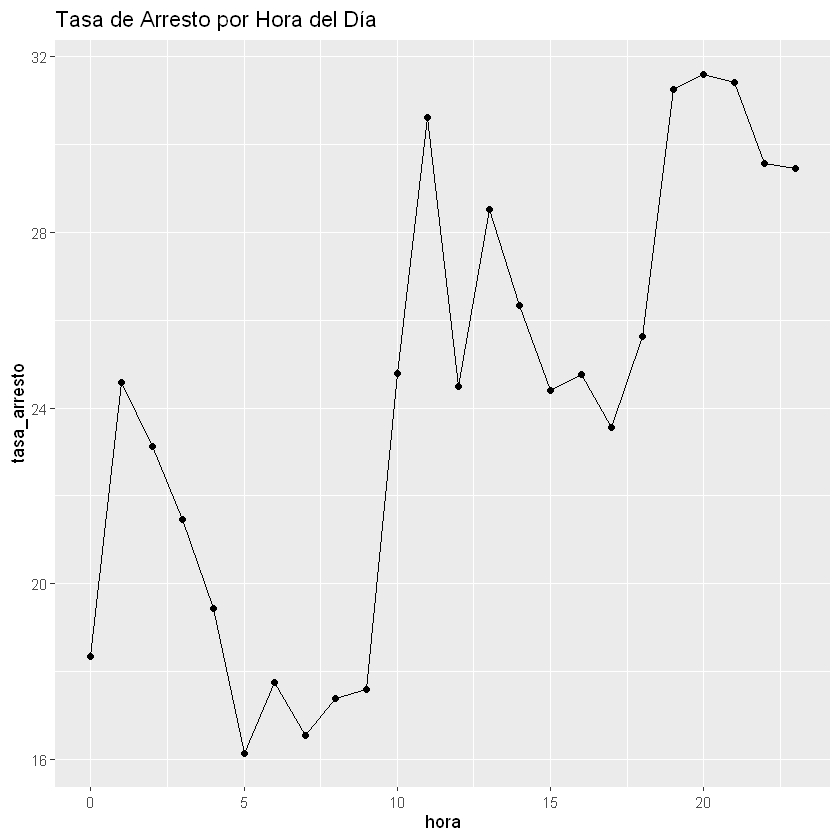

In [12]:
ggplot(tasa_hora, aes(x = hora, y = tasa_arresto)) +
  geom_line() +
  geom_point() +
  labs(title = "Tasa de Arresto por Hora del Día")

el grafico muestra una evolucion de la probabilidad de arresto a lo largo de las 24 horas del dia, las horas de madrugada (4 a 6 de la mañana) presenta una tasa baja de arresto, posiblemente a una menor presencia policial y tambien una menor actividad criminal. En constraste, las horas picos ocurren en al mediodia aprimadamente a las 11 de la mañana, y en horas tampranas de la noche (19 a 21 hrs), que coincide con una mayor actividad policial y patrullaje. Durante la madrugada (0 a 6 am) se observa una disminucion progresiva en la tasa de arresto, hasta un punto minimo en las primeras horas del dia. Y finalmente, a partir de las 19 hrs, la tasa de arresto comienza a aumentar significativamente que se mantienen elevadas en la noche,posiblemente por la mayor efectividad policial en esas horas. Esto indica que la hora del día tiene influencia en la probabilidad de arresto, justificando su inclusión como predictor

In [13]:
# Convertir arresto a 0/1
datos_cor <- datos %>%
  mutate(arresto_num = as.numeric(arresto))

# Test de correlación
cor.test(datos_cor$hora, datos_cor$arresto_num)


	Pearson's product-moment correlation

data:  datos_cor$hora and datos_cor$arresto_num
t = 236.91, df = 8431414, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08064753 0.08198858
sample estimates:
       cor 
0.08131809 


El test de correlacion de Pearson entre Hora y Arresto arroja un coeficiente de r=0.0813 con un p-valor < 2.2e-16, esto indica una correlacion positiva que es estadisticamente significativa entre ambas variables
aunque el coeficiente de correlacion es muy bajo, el p-valor es practicamente cero ademas de una tamaño muestral de 8.4 millones de registros, por lo tanto la relacion observada es estadisticamente real. combinado con el grafico que revela un comportamiento no lineal con muchos picos y valles, que no son captados por la correlacion de Pearson, se concluye que la variable hora tiene una relacion estadisticamente significativa con la variable arresto, por lo que se justifica su inclusion como predictor en el modelo de random forest

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre dia y arresto</div>
    </div>
</div>

la variable dia se convertirá a factor por diferentes motivos:
- dia tiene valores de 1 al 7, pero no son numeros, son etiquetas categoricas que representan dias de la semana
el modelo tendra problemas si se lo deja asi, porque el modelo pensara que 7 es mayor que 1 por lo que intentara encontrar una relacion matematica entre los dias, por lo que eso no tiene sentido
- al convertirlo a factor, el modelo tratara cada dia comoo una categoria unica por lo que no asumira relaciones matematicas entre ellos
- se necesita que el modelo aprenda patrones especificos de cada uno de los dias, por ejemplo, los fines de semana pueden tener tasas de arresto diferentes a los dias laborales
- ademas se usara level=1:7 para definir el orden correcto de los dias de la semana

In [14]:
# etiquetar los dias de la semana
datos <- datos %>%
  mutate(dia = factor(dia, levels = 1:7,
                      labels = c("Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo")))

cat("Clase de dia:", class(datos$dia), "\n")
cat("Niveles:", levels(datos$dia), "\n")

Clase de dia: factor 
Niveles: Lunes Martes Miércoles Jueves Viernes Sábado Domingo 


In [15]:
# calcular la tasa de arresto por dia de la semana
tasa_dia <- datos %>%
  group_by(dia) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

tasa_dia

dia,tasa_arresto
<fct>,<dbl>
Lunes,24.36674
Martes,25.89142
Miércoles,26.02020
Jueves,25.91179
Viernes,25.16954
Sábado,24.86784
Domingo,24.26427


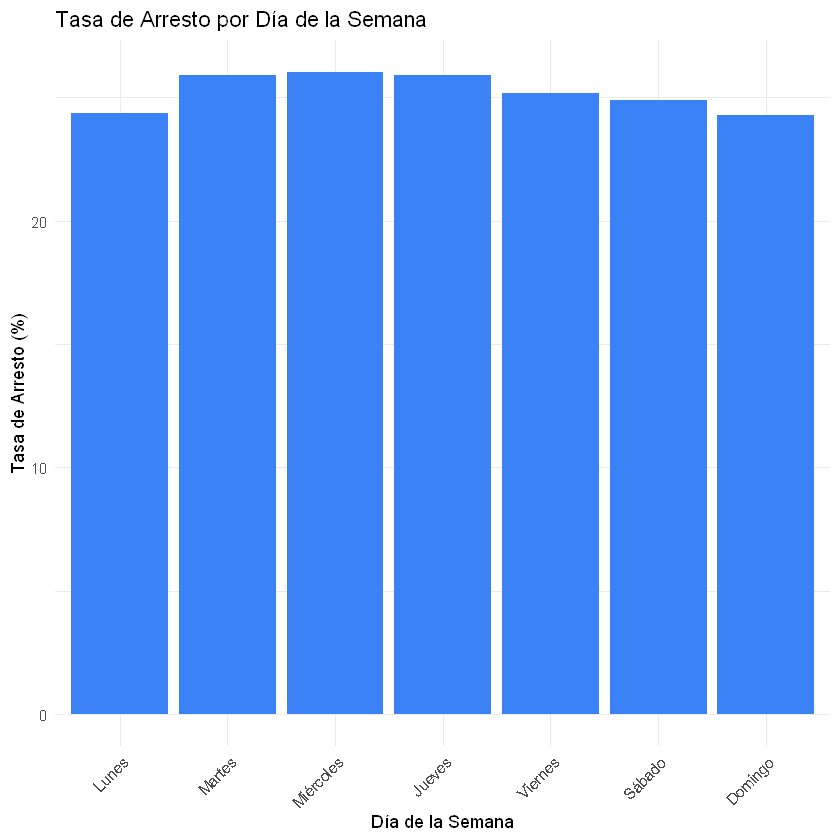

In [16]:
ggplot(tasa_dia, aes(x = dia, y = tasa_arresto)) +
  geom_col(fill = "#3b82f6") +
  labs(title = "Tasa de Arresto por Día de la Semana",
       x = "Día de la Semana",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El gráfico de barras revela un patrón interesante en la tasa de arresto según el día de la semana. Los días laborales de mitad de semana (martes, miércoles y jueves) presentan las tasas de arresto más altas, alcanzando valores entre 25.9% y 26.0%. En contraste, el lunes y domingo muestran las tasas más bajas, aproximadamente 24.3-24.4%.

Este comportamiento puede explicarse por varios factores: durante la mitad de semana existe mayor presencia policial y actividad comercial, lo que incrementa las oportunidades de detección y arresto. El lunes, posiblemente debido al inicio de la semana laboral, tiene una tasa de arresto menor (24.37%). El domingo presenta la tasa más baja (24.26%), lo cual podría relacionarse con menor actividad general y posiblemente menor personal policial en servicio.

La variación entre el día con menor tasa de arresto (domingo: 24.26%) y el día con mayor tasa (miércoles: 26.02%) es de aproximadamente 1.76 puntos porcentuales, lo que representa una diferencia relativa del 7.3%. Aunque esta diferencia puede parecer pequeña, con un dataset de 8.4 millones de registros, esta variación es estadísticamente significativa y relevante para el modelo predictivo.

In [17]:
# tabla de contingencia
tabla_dia <- table(datos$dia, datos$arresto)
tabla_dia

           
             FALSE   TRUE
  Lunes     902264 290682
  Martes    892205 311711
  Miércoles 895828 315081
  Jueves    888351 310694
  Viernes   946074 318216
  Sábado    908453 300687
  Domingo   871847 279323

In [18]:
# Test Chi-Cuadrado
chi_test_dia <- chisq.test(tabla_dia)
print(chi_test_dia)

# Calcular Cramér's V (medida de asociación)
# Cramér's V varía entre 0 (sin asociación) y 1 (asociación perfecta)
cramer_v <- sqrt(chi_test_dia$statistic / (sum(tabla_dia) * (min(dim(tabla_dia)) - 1)))
cat("\nCramér's V:", cramer_v, "\n")


	Pearson's Chi-squared test

data:  tabla_dia
X-squared = 2102.5, df = 6, p-value < 2.2e-16




Cramér's V: 0.0157912 


El test chi-cuadrado entre el dia y el arresto da un estadistico de x^2 = 2102.5 con 6 grados de libertad y un p-valor < 2.2e-16, indica una asociacion estadisticamente significativa entre ambas variables. el p-valor que es casi cero puede confirmar una relacion real entre estas dos variables ya que no es producto del azar

debido a la limitaciones del test chi-cuadrado para medir la magnitud de la asociacion entre variables categoricas con muestras grandes, se calcula el coeficiente de Cramér's V, que es una medida estandarizada de la fuerza de la asociacion entre variables categoricas. El coeficiente de Cramér's V se calcula como:

$$
V = \sqrt{\frac{X^2}{n(k-1)}}
$$
donde X² es el estadístico chi-cuadrado, n es el tamaño de la muestra (8.4 millones) y k es el número de categorías en la variable con menos categorías (7 dias de la semana)

El coeficiente de Cramér's V se interpreta en una escala de 0 a 1, donde 0 indica ninguna asociación y 1 indica una asociación perfecta. Generalmente es una complementacion muy buena con chi-cuadrado para entender la relacion entre variables categoricas

En este caso el coeficiente de Cramér's V da como resultado 0.0158, por lo que indica una asociacion practicamente nula entre las dos variables. Aunque tenermos que pensar que este valor es afectador por la cantidad de muestras (8.4 millones), aunque se tienen asociaciones pequeñas este valor bajo es capaz de demostrar que, aunque existe una relacion real y consistente, el dia de la semana por si solo no es un predictor dominante de arrestos.

por lo tanto a pesar que el coeficiente es muy bajo, se tiene evidencia estadistica fuerte que combinada con las diferencias que se pueden observar en el grafico, se tiene una buena justificacion para no eliminar la variable dia del modelo de random forest, porque puede aportar informacion util para predecir arrestos en conjunto con otras variables

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre mes y arresto</div>
    </div>
</div>

la razon de convertir mes a factor es practicamente la misma que la variable dia

In [19]:
# mes a factor con etiquetas de los meses
datos <- datos %>%
  mutate(mes = factor(mes, levels = 1:12,
                      labels = c("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                                 "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")))

# Verificar la conversión
cat("Clase de mes:", class(datos$mes), "\n")
cat("Niveles:", levels(datos$mes), "\n")

Clase de mes: factor 
Niveles: Enero Febrero Marzo Abril Mayo Junio Julio Agosto Septiembre Octubre Noviembre Diciembre 


In [20]:
# tasa de arresto por mes
tasa_mes <- datos %>%
  group_by(mes) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

tasa_mes

mes,tasa_arresto
<fct>,<dbl>
Enero,26.98266
Febrero,28.35193
Marzo,27.01089
Abril,25.82929
Mayo,25.14666
Junio,24.13367
Julio,23.79690
Agosto,24.19910
Septiembre,24.43722


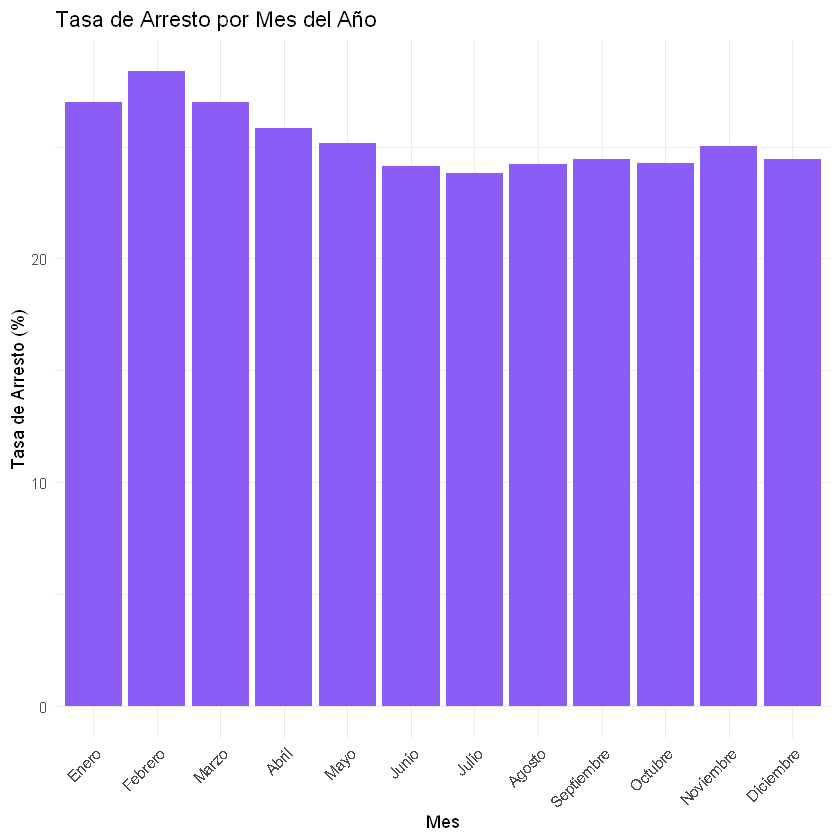

In [21]:
ggplot(tasa_mes, aes(x = mes, y = tasa_arresto)) +
  geom_col(fill = "#8b5cf6") +
  labs(title = "Tasa de Arresto por Mes del Año",
       x = "Mes",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El grafico muestra una variacion estacional en la tasa de arresto a lo largo de los años, revela que en los meses de invierno y principis de primavera (Enero, Febrero y Marzo) tienen tasas de arresto altas. Lo que va en contraste con meses de verano (Junio, Julio y Agosto) que tienen tasas bajas

Esta tendencia se explica por factores donde los meses mas frios pueden tener mayor eficacia policial en espacios cerrdos, esto se cree asi porque en verano las actividades al aire libre pueden dificultar los arrestos. Ademas, ciertos tipos de crimenes predominan en diferentes estaciones, afectando las tasas de captura
Al existir una diferencia porcentual entre el mes con una mayor tasa (Febrero: 28.35%) y el de menor tasa (Julio: 23.80%) se confirma que los meses del año si tienen influencua en como se realizan los arrestos y se justifica su inclusion como predictor en el modelo de random forest 

In [22]:
# tabla de contingencia
tabla_mes <- table(datos$mes, datos$arresto)
tabla_mes

            
              FALSE   TRUE
  Enero      482860 178435
  Febrero    418750 165704
  Marzo      504627 186746
  Abril      510514 177782
  Mayo       560522 188305
  Junio      568191 180746
  Julio      600562 187545
  Agosto     590508 188517
  Septiembre 554686 179387
  Octubre    557157 178526
  Noviembre  487480 162879
  Diciembre  469165 151822

In [23]:
# Test Chi-Cuadrado
chi_test_mes <- chisq.test(tabla_mes)
print(chi_test_mes)

# Calcular Cramér's V
cramer_v_mes <- sqrt(chi_test_mes$statistic / (sum(tabla_mes) * (min(dim(tabla_mes)) - 1)))
cat("\nCramér's V:", cramer_v_mes, "\n")


	Pearson's Chi-squared test

data:  tabla_mes
X-squared = 7987.7, df = 11, p-value < 2.2e-16


Cramér's V: 0.03077947 


El test chi-cuadrado entre el mes del año y el arresto da como estadistico X² = 7987.7 con 11 grados de libertad y con un p-valor < 2.2e-16, indica una asociacion estadiscticamente significativa entre estas dos variables

aunque el coeficiente de Cramér's V es bajo (0.0308), e indica una asociacion muy debil (<0.10), con un p-valor casi cero y un tamaño de muestra de 8.4 millones confirma la variacion estacional que pueden ser observadas y no son productos de algo azar sino patrones reales. Esto lo demuestra el grafico, con la tendencia estacional clara
se debe tomar en cuenta que el modelo de random forest sera capaz de aprovechar estos patrones para mejorar sus diferentes predicciones, aunque no tendra un gran peso por si sola, al combinarla con las demas variables temporales el modelo podra capturar las interacciones complejas. Se justifica claramente el uso de la variable mes como predictor en el modelo de random forest

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre año y arresto</div>
    </div>
</div>

In [24]:
cat("Clase de año:", class(datos$año), "\n")
cat("Rango de años:", range(datos$año), "\n")

Clase de año: numeric 
Rango de años: 2001 2025 


A difencia de las variables anteriores, Año se mantiene como numerica (2001-2025) en lugar de convertirla a factor. La decision fue tomada porque convertirla a factor crearia 24 categorias diferentes, lo cuales son muchas y aumentaria la complejidad del modelo inncesariamente. ademas, existe una progresion temporal natural en la que el random forest puede identificar patrones como "antes/despues de 2015" o tendencias a lo largo del tiempo. y finalmente las politicas policiales y las tasas de arrestos tienden a ser graduales y no categoricas. por lo que el formato se mantiene en munerico porque se captura una mejor evolucion continua. Todo esto reduce el riesgo de sobreajuste que es algo que no se quiere en el modelo

In [25]:
# Calcular tasa de arresto por año
tasa_año <- datos %>%
  group_by(año) %>%
  summarise(tasa_arresto = mean(arresto) * 100)

print(tasa_año)

# A tibble: 25 × 2
     año tasa_arresto
   <dbl>        <dbl>
 1  2001         29.2
 2  2002         29.1
 3  2003         29.7
 4  2004         30.8
 5  2005         31.1
 6  2006         30.2
 7  2007         30.2
 8  2008         25.8
 9  2009         28.2
10  2010         27.1
# ℹ 15 more rows


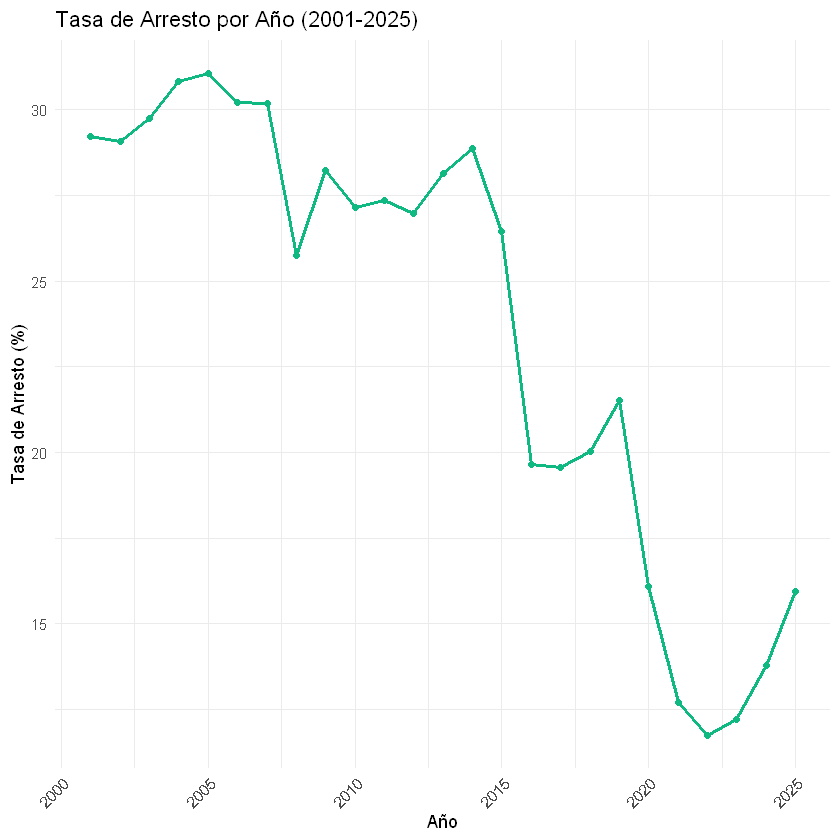

In [26]:
ggplot(tasa_año, aes(x = año, y = tasa_arresto)) +
  geom_line(color = "#10b981", linewidth = 1) +
  geom_point(color = "#10b981") +
  labs(title = "Tasa de Arresto por Año (2001-2025)",
       x = "Año",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El grafico de linea muestra las tendencias dramaicas que sigue la tasa de arresto a lo largo de 25 años (2001-2025). Se distinguen 3 periodos diferenciados, donde el primer periodo (2001-2007) presenta tasas de arresto altas y estables, entre un 29% y un 31% muy posiblemente por politicas policiales mucho mas agresivas y un mayor enfasis en arrestar

El segundo periodo marcado entre 2008-2015 que muestra una transicion marcada con alta volatilidad, en 2008 se marca una caida abrupta hasta un 25.75%, con una pequeña recuperacion hasta 2014 (28.88%) para luego descender nuevamente. Patrones erraticos que pueden marcar la crisis financiera global del 2008-2009, se tuvieron recortes presupuestarios policiales, y el inicio de reformas en el sistema de justicia penal de Chicago

El tercer periodo marcado entre 2016-2025 se exibe con un cambio radical y a la vez sostenido, que en 2015-2016 ocurre una caida drastica de 26.46% a 19.66%, la causa es por la caida masiva de las paradas y cacheos (police stops and frisks), una disminucion significativa de la actividad policial proactiva y un aumento de crimen violento que llevo a una menor tasa de arresto. Esta caida continua hasta alcanzar el minimo historico de 11.76% en 2022. entre los años 2020-2022 son particularmente notables por la pandemia del COVID-19, el efecto "Ferguson", reformas de la justicia penal y reduccion del numero de agentes policiales. Finalmente los años 2023-2025 muestran una ligera recuperacion hasta 15.96%, aunque las tasas permanecen considerablemente por debajo de los niveles historicos

La diferencia entre el año con mayor tasa de arresto (2005: 31.06%) y el año con menor tasa (2022: 11.76%) es de 19.3 puntos porcentuales, lo que representa una reducción del 62% en la probabilidad de arresto. Esta tendencia temporal tan marcada confirma que el año es un predictor crucial para el modelo, capturando la evolución histórica de las políticas policiales y el contexto sociopolítico de Chicago.

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre fin de semana y arresto</div>
    </div>
</div>

In [27]:
# Tabla de contingencia
tabla_finde <- table(datos$finde, datos$arresto)
tabla_finde

   
      FALSE    TRUE
  0 4524722 1546384
  1 1780300  580010

In [28]:
# Test Chi-Cuadrado
chi_test_finde <- chisq.test(tabla_finde)
print(chi_test_finde)

# Cramér's V
cramer_v_finde <- sqrt(chi_test_finde$statistic / (sum(tabla_finde) * (min(dim(tabla_finde)) - 1)))
cat("\nCramér's V:", cramer_v_finde, "\n")


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabla_finde
X-squared = 726.24, df = 1, p-value < 2.2e-16


Cramér's V: 0.009280893 


La variable `finde` es un indicador binario que distingue si el crimen ocurrió en fin de semana (sábado o domingo = 1) o en día laboral (lunes a viernes = 0). 
El test chi-cuadrado entre la variable finde y el arresto da como resultado un estadistico X² = 726.24 con 1 grado de libertad y un p-valor < 2.2e-16, indica una asociacion estadisticamente significativa entre las dos variables. Aunque el coeficiente de Cramér's V es bajo (0.009), e indica una asociacion muy debil (<0.10). Se tiene mas de 8.4 millones de registros, por lo que la variable captura patrones de comportamientos y respuestas policiales especificos en los fines de semana, por lo que se justifica su inclusion en el modelo de random forest

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Correlacion entre si es de noche y arresto</div>
    </div>
</div>

In [29]:
# Tabla de contingencia
tabla_denoche <- table(datos$denoche, datos$arresto)
tabla_denoche

   
      FALSE    TRUE
  0 3846607 1275154
  1 2458415  851240

In [30]:
# Test Chi-Cuadrado
chi_test_denoche <- chisq.test(tabla_denoche)
print(chi_test_denoche)

# Cramér's V
cramer_v_denoche <- sqrt(chi_test_denoche$statistic / (sum(tabla_denoche) * (min(dim(tabla_denoche)) - 1)))
cat("\nCramér's V:", cramer_v_denoche, "\n")


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabla_denoche
X-squared = 722.21, df = 1, p-value < 2.2e-16


Cramér's V: 0.009255122 


la variable denoche muestra una ananlisis de que los crimines nocturnos tienen una tasa de arresto ligeramente mayor (25.72%) en comparacion con los diurnos (24.89%). Aunque es una diferencia pequeña que se atribuye a factores como el patrullaje policial, variaciones en la visibilidad y cantidad de testigos. La diferencia es muy pequeña pero puede ser estadisticamente significativa por tener un tamaño muestral tan grande (8.4 millones de registros)

el test chi-cuadrado tiene un estadistico X² = 722.21 con 1 grado de libertad y un p-valor < 2.2e-16, muestra una relacion estadisticamente significativa entre las dos variables. Complementado con el coeficiene de Cramér's V que da un valor de 0.0093 indica una asociación extremadamente débil pero estadísticamente real debido al enorme tamaño muestral de 8.4 millones de registros.

Es importante recalcar que todas las variables temporales derivadas de la variable Fecha (Date) son capaces de aportar patrones unicos y complementarios que el modelo de random forest puede aprovechar para mejorar sus predicciones. El modelo de random forest decidira el peso relativo de estas variables durante el entrenamiento. Apesar de que Cramer's V es extremadamente bajo, la significancia estadística perfecta (p < 2.2e-16) y la capacidad de capturar interacciones complejas justifican mantener todas las variables temporales (`hora`, `dia`, `mes`, `año`, `finde` y `denoche`) en el modelo.

###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Analisis de las variables categoricas principales</div>
    </div>
</div>

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Variable: tipo (Primary Type) y arresto</div>
    </div>
</div>

In [31]:
# Verificar cantidad de categorías y distribución
cat("Número de categorías únicas:", n_distinct(datos$tipo), "\n\n")

# Calcular porcentaje de cada tipo
tipo_freq <- datos %>%
  count(tipo) %>%
  mutate(porcentaje = n / sum(n) * 100) %>%
  arrange(desc(n))

print(tipo_freq)

Número de categorías únicas: 34 

# A tibble: 34 × 3
   tipo                      n porcentaje
   <chr>                 <int>      <dbl>
 1 THEFT               1789890      21.2 
 2 BATTERY             1536196      18.2 
 3 CRIMINAL DAMAGE      958807      11.4 
 4 NARCOTICS            763984       9.06
 5 ASSAULT              565051       6.70
 6 OTHER OFFENSE        525819       6.24
 7 BURGLARY             445819       5.29
 8 MOTOR VEHICLE THEFT  431305       5.12
 9 DECEPTIVE PRACTICE   388445       4.61
10 ROBBERY              314724       3.73
# ℹ 24 more rows


La variable `tipo` (Primary Type) categoriza los crímenes según su naturaleza principal, con 34 categorías únicas. El análisis de frecuencias revela que los tipos más comunes son THEFT, BATTERY, CRIMINAL DAMAGE y NARCOTICS, que concentran aproximadamente 59.86% del total de crímenes.

In [32]:
# tasa de arresto por tipo de crimen
tasa_tipo <- datos %>%
  group_by(tipo) %>%
  summarise(
    n = n(),
    tasa_arresto = mean(arresto) * 100
  ) %>%
  arrange(desc(tasa_arresto))

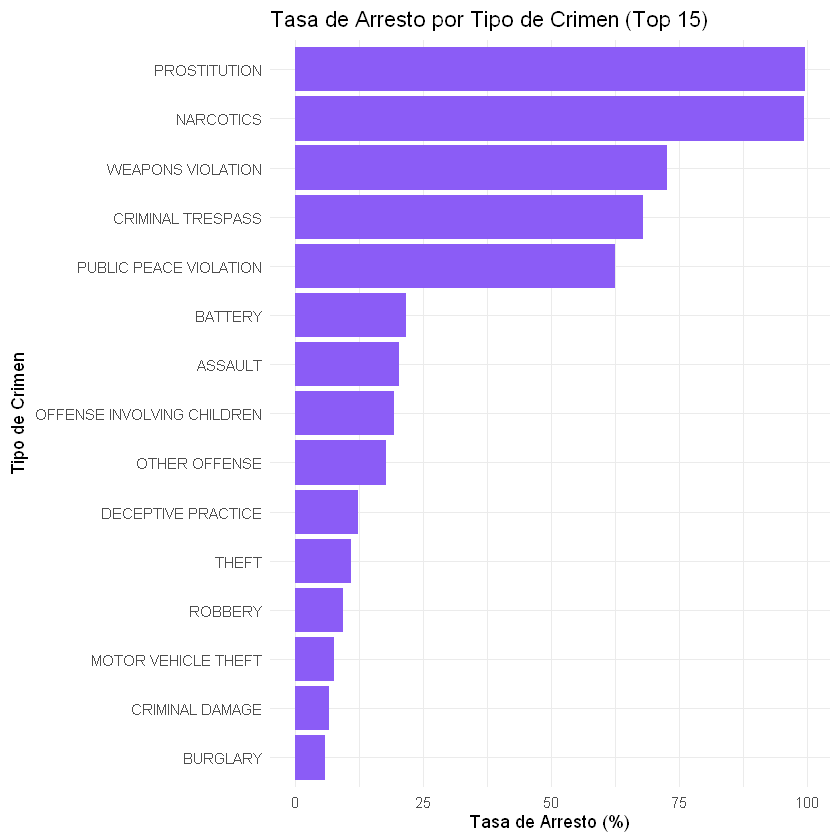

In [33]:
# Gráfico de barras con los 15 tipos más frecuentes
top15_tipos <- datos %>%
  count(tipo) %>%
  top_n(15, n) %>%
  pull(tipo)

datos %>%
  filter(tipo %in% top15_tipos) %>%
  group_by(tipo) %>%
  summarise(tasa_arresto = mean(arresto) * 100) %>%
  ggplot(aes(x = reorder(tipo, tasa_arresto), y = tasa_arresto)) +
  geom_col(fill = "#8b5cf6") +
  coord_flip() +
  labs(title = "Tasa de Arresto por Tipo de Crimen (Top 15)",
       x = "Tipo de Crimen",
       y = "Tasa de Arresto (%)") +
  theme_minimal()

El gráfico de barras muestra una variación dramática en las tasas de arresto según el tipo de crimen. Los crímenes con mayores tasas de arresto son THEFT, BATTERY, CRIMINAL DAMAGE y NARCOTICS. Estos tipos de crímenes suelen ser más visibles y detectables, lo que facilita la intervención policial y el arresto. En contraste, los crímenes con las tasas de arresto más bajas incluyen MOTOR VEHICLE THEFT, BURGLARY y ROBBERY. Estos delitos a menudo involucran situaciones más complejas, como la ausencia de testigos o la dificultad para identificar a los perpetradores, lo que reduce la probabilidad de arresto.

In [34]:
# Tabla de contingencia
tabla_tipo <- table(datos$tipo, datos$arresto)

In [35]:
# Test Chi-Cuadrado
chi_test_tipo <- chisq.test(tabla_tipo)
print(chi_test_tipo)

# Cramér's V
cramer_v_tipo <- sqrt(chi_test_tipo$statistic / (sum(tabla_tipo) * (min(dim(tabla_tipo)) - 1)))
cat("\nCramér's V:", cramer_v_tipo, "\n")

Warning message in chisq.test(tabla_tipo):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tabla_tipo
X-squared = 3638868, df = 33, p-value < 2.2e-16


Cramér's V: 0.6569509 


El test de Chi-Cuadrado arroja un estadístico X² = 3638868 con 33 y un p-valor < 2.2e-16, confirmando una asociación estadísticamente significativa. El coeficiente de Cramér's V de 0.656 indica una asociación fuerte, siendo esta una de las variables con mayor poder predictivo individual. La variable `tipo` es absolutamente crucial para el modelo, ya que el tipo de crimen es probablemente el predictor más importante de si habrá arresto o no, justificando plenamente su inclusión en el modelo de Random Forest.

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Variable: distrito (District) y arresto</div>
    </div>
</div>

In [36]:
# Verificar categorías
cat("Número de distritos únicos:", n_distinct(datos$distrito), "\n")
cat("NAs en distrito:", sum(is.na(datos$distrito)), "\n\n")

Número de distritos únicos: 26 
NAs en distrito: 47 



La variable `distrito` identifica el distrito policial de Chicago donde ocurrió el crimen, con 26 distritos únicos numerados del 1 al 26. Esta variable captura información geográfica-administrativa sin tener los problemas de alta dimensionalidad de variables más granulares como Beat o Ward.

In [37]:
# Frecuencia de distritos
distrito_freq <- datos %>%
  count(distrito) %>%
  mutate(porcentaje = n / sum(n) * 100) %>%
  arrange(desc(n))

print(distrito_freq)

# A tibble: 26 × 3
   distrito      n porcentaje
   <chr>     <int>      <dbl>
 1 008      565510       6.71
 2 011      535026       6.35
 3 006      492594       5.84
 4 004      477422       5.66
 5 007      477259       5.66
 6 025      476103       5.65
 7 003      427867       5.07
 8 012      425642       5.05
 9 009      408958       4.85
10 002      401861       4.77
# ℹ 16 more rows


In [38]:
# Calcular tasa de arresto por distrito
tasa_distrito <- datos %>%
  filter(!is.na(distrito)) %>%
  group_by(distrito) %>%
  summarise(
    n = n(),
    tasa_arresto = mean(arresto) * 100
  ) %>%
  arrange(desc(tasa_arresto))

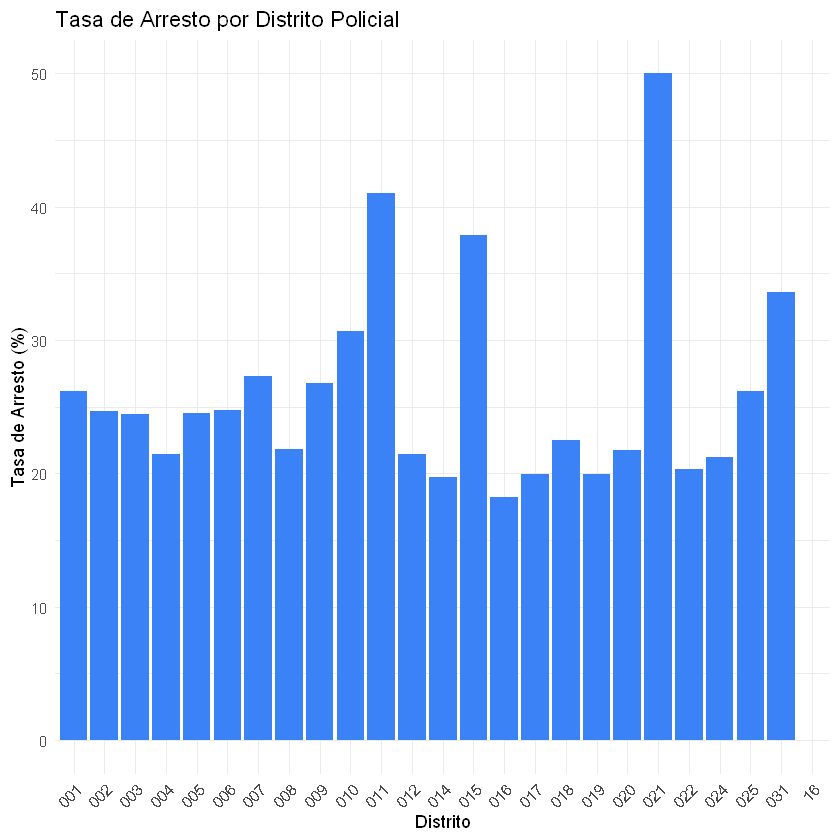

In [39]:
# Gráfico de barras
ggplot(tasa_distrito, aes(x = factor(distrito), y = tasa_arresto)) +
  geom_col(fill = "#3b82f6") +
  labs(title = "Tasa de Arresto por Distrito Policial",
       x = "Distrito",
       y = "Tasa de Arresto (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

El gráfico de barras muestra que existen diferencias notables en las tasas de arresto entre distritos. Los distritos con mayores tasas de arresto son Distrito 21 con 50%, Distrito 1 con ~42%, mientras que los de menor tasa incluyen Distrito 16 con ~20%, Distrito 19 con ~19%

Estas diferencias pueden reflejar varios factores: variaciones en los recursos policiales asignados a cada distrito, diferencias demográficas y socioeconómicas de las áreas, distintos tipos de crímenes prevalentes en cada zona, y diferentes estrategias de patrullaje implementadas por cada comandancia distrital. Los distritos del centro de la ciudad (Loop y áreas comerciales) suelen tener mayor presencia policial y tasas de arresto más altas, mientras que distritos periféricos o con mayor extensión territorial pueden tener tasas menores.

In [40]:
# Tabla de contingencia (sin NAs)
tabla_distrito <- table(datos$distrito[!is.na(datos$distrito)], 
                        datos$arresto[!is.na(datos$distrito)])

# Test Chi-Cuadrado
chi_test_distrito <- chisq.test(tabla_distrito)
print(chi_test_distrito)

# Cramér's V
cramer_v_distrito <- sqrt(chi_test_distrito$statistic / (sum(tabla_distrito) * (min(dim(tabla_distrito)) - 1)))
cat("\nCramér's V:", cramer_v_distrito, "\n")

Warning message in chisq.test(tabla_distrito):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tabla_distrito
X-squared = 149349, df = 24, p-value < 2.2e-16


Cramér's V: 0.1330921 


El test de Chi-Cuadrado arroja un estadístico X² = 149349 con 24 y un p-valor < 2.2e-16, confirmando una asociación estadísticamente significativa. El coeficiente de Cramér's V de 0.133 indica una asociación débil pero real. La variable `distrito` aporta información geográfica sin la complejidad de coordenadas continuas, permitiendo al modelo capturar patrones territoriales de eficacia policial, justificando su inclusión en el modelo de Random Forest.

###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Detección de N/A</div>
    </div>
</div>

In [41]:
# Ver NAs por variable
na_summary <- data.frame(
  NAs = colSums(is.na(datos)),
  Porcentaje = round(colSums(is.na(datos)) / nrow(datos) * 100, 4)
) %>%
  filter(NAs > 0) %>%
  arrange(desc(NAs))

na_summary

,NAs,Porcentaje
,<dbl>,<dbl>
latitud,93963,1.1144
longitud,93963,1.1144
lugar,15062,0.1786
distrito,47,0.0006


El análisis de valores faltantes revela que solo 3 tres variables contienen NAs: `lugar` (15,062 NAs, 0.18%), `distrito` (47 NAs, 0.0006%) y `longitud / latitud` (93,963 NAs, 1.11%), estas coordenadas son las mismas y por ese motivo se las toma como una sola. El resto de variables están completas.

In [42]:
tabla_na_total <- datos %>%
  mutate(con_na = if_else(rowSums(is.na(.)) > 0, "Total NA", "Sin NA")) %>%
  count(con_na)

tabla_na_total

con_na,n
<chr>,<int>
Sin NA,8327607
Total NA,103809


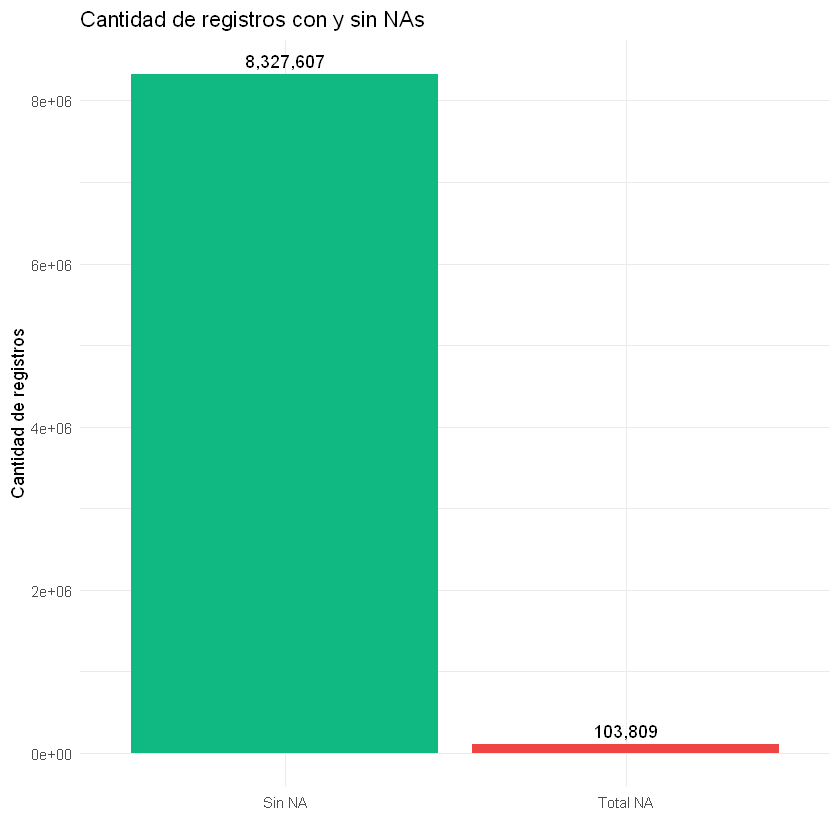

In [43]:
ggplot(tabla_na_total, aes(x = con_na, y = n, fill = con_na)) +
    geom_col() +
    geom_text(aes(label = scales::comma(n)), vjust = -0.5) +
    scale_fill_manual(values = c("Sin NA" = "#10b981", "Total NA" = "#ef4444")) +
    labs(title = "Cantidad de registros con y sin NAs",
             x = "", y = "Cantidad de registros") +
    theme_minimal() +
    theme(legend.position = "none")


La eliminación de 103,809 observaciones (1.23% del total) se justifica estadísticamente porque la pérdida de poder es minima en un conjunto de 8.3M de registros y porque las variables con NAs (principalmente coordenadas y lugar) son críticas y difíciles de imputar sin introducir sesgo espacial o clasificación errónea.
Al suponer que la causa del faltado no es sistemáticamente dependiente del resultado (o bien que el sesgo introducido por su exclusión es menor que el de una imputación errónea), la exclusión minimiza la introducción de error de medición y preserva la coherencia interna de las variables geográficas.
La decisión prioriza la validez interna sobre la maximización del tamaño muestral: preferible mantener observaciones completas y confiables a incorporar datos reconstruidos con alta incertidumbre.

In [44]:
# Eliminar registros con cualquier NA
datos <- datos %>%
  filter(!if_any(everything(), is.na))

print(colSums(is.na(datos)))

cat("Registros después de eliminar NAs:", nrow(datos), "\n")

     tipo     lugar   arresto domicilio  distrito   latitud  longitud      hora 
        0         0         0         0         0         0         0         0 
      dia       mes       año     finde   denoche 
        0         0         0         0         0 
Registros después de eliminar NAs: 8327607 


###
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#7c3aed,#a855f7); padding:14px; border-radius:8px; box-shadow:0 4px 12px rgba(124,58,237,0.15); color:#fff; max-width:fit-content; width:min(800px,100%); margin:10px auto; margin-left:80px; box-sizing:border-box;">
    <div style="width:28px; height:28px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:6px; font-size:1.2rem; line-height:1;">⚙️</div>
    <div>
        <div style="font-weight:700; font-size:1.15rem;">Detección de outliers geograficos</div>
    </div>
</div>

las variables latitud y longitud son coordenadas geograficas que indican la ubicación de cada crimen en Chicago. Para garantizar un modelo robusto, se realiza una deteccion de outliers usando un geojson oficial que muestra los limites de la ciudad, los puntos que se encuentren afuera de este limite se consideran outliers y se eliminan del dataset.

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Carga de límites geográficos</div>
    </div>
</div>

In [45]:
limites_chicago <- st_read("Limites_Chicago.geojson", quiet = TRUE)

In [46]:
# Convertir datos a objeto espacial para que la libreria sf pueda trabajar con las coordenadas
datos_sf <- st_as_sf(datos, coords = c("longitud", "latitud"), crs = 4326)

In [47]:
# Asegurar que ambos conjuntos de datos utilizan el mismo sistema de referencia espacial
limites_chicago <- st_transform(limites_chicago, st_crs(datos_sf))

In [48]:
# Verificar qué puntos están dentro de los límites de Chicago
dentro_limites <- st_within(datos_sf, limites_chicago, sparse = FALSE)

In [49]:
head(dentro_limites)

TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Identificar de outliers geográficos</div>
    </div>
</div>

In [50]:
tabla_outliers <- data.frame(
  Categoria = c("Dentro de Chicago", "Fuera de Chicago (Outliers)"),
  Cantidad = c(sum(dentro_limites), sum(!dentro_limites)),
  Porcentaje = c(
    round(sum(dentro_limites) / nrow(datos_sf) * 100, 2),
    round(sum(!dentro_limites) / nrow(datos_sf) * 100, 2)
  )
)
tabla_outliers

Categoria,Cantidad,Porcentaje
<chr>,<int>,<dbl>
Dentro de Chicago,8304869,99.73
Fuera de Chicago (Outliers),22738,0.27


In [51]:
# crear una columna con outliers
datos_sf$es_outlier <- !dentro_limites

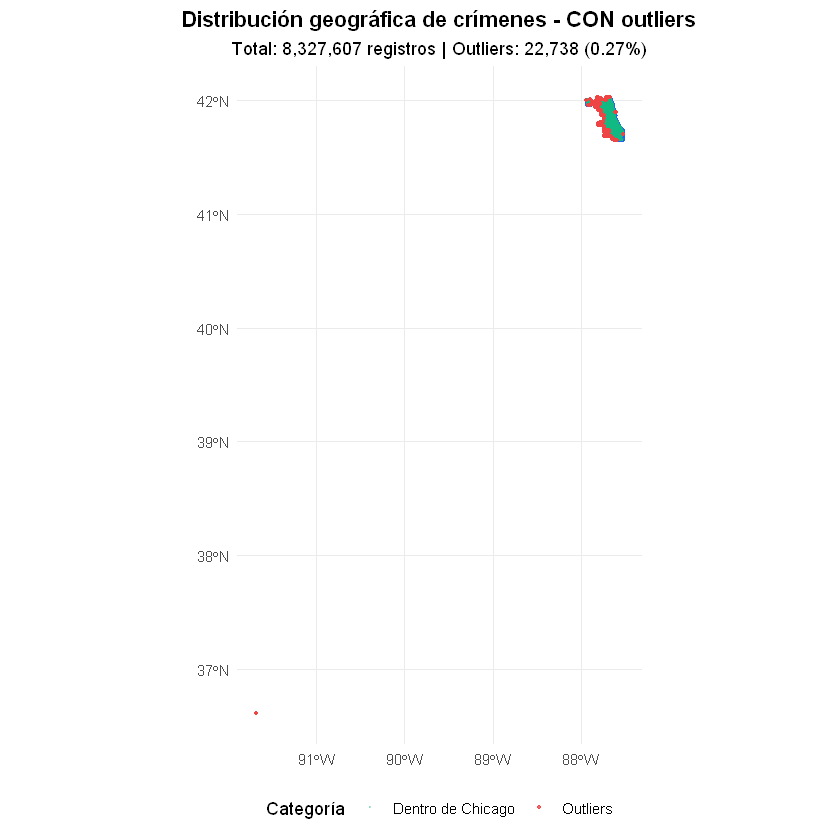

In [51]:
ggplot() +
  geom_sf(data = limites_chicago, fill = NA, color = "#2563eb", size = 1) +
  geom_sf(data = datos_sf[datos_sf$es_outlier == FALSE, ], 
          aes(color = "Dentro de Chicago"), alpha = 0.3, size = 0.1) +
  geom_sf(data = datos_sf[datos_sf$es_outlier == TRUE, ], 
          aes(color = "Outliers"), alpha = 0.8, size = 0.8) +
  scale_color_manual(values = c("Dentro de Chicago" = "#10b981", "Outliers" = "#ef4444")) +
  labs(
    title = "Distribución geográfica de crímenes - CON outliers",
    subtitle = sprintf("Total: %s registros | Outliers: %s (%.2f%%)", 
                      scales::comma(nrow(datos_sf)), 
                      scales::comma(sum(!dentro_limites)),
                      sum(!dentro_limites) / nrow(datos_sf) * 100),
    color = "Categoría"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  )

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Eliminación de outliers geográficos</div>
</div>

In [52]:
# Obtener las coordenadas de los puntos que están dentro de Chicago
datos_limpios_sf <- datos_sf[dentro_limites, ]

In [53]:
# Extraer coordenadas y fusionar con el dataframe original
coordenadas_validas <- st_coordinates(datos_limpios_sf)
datos_limpios <- st_drop_geometry(datos_limpios_sf)
datos_limpios$longitud <- coordenadas_validas[, 1]
datos_limpios$latitud <- coordenadas_validas[, 2]

In [54]:
# eliminar columna auxiliar
datos_limpios <- datos_limpios %>% select(-es_outlier)

In [55]:
# Actualizar el dataframe principal
datos <- datos_limpios

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Visualización: Dataset SIN outliers</div>
    </div>
</div>

In [56]:
# Convertir datos limpios a objeto espacial para visualización
datos_limpios_sf <- datos %>%
  st_as_sf(coords = c("longitud", "latitud"), crs = 4326)

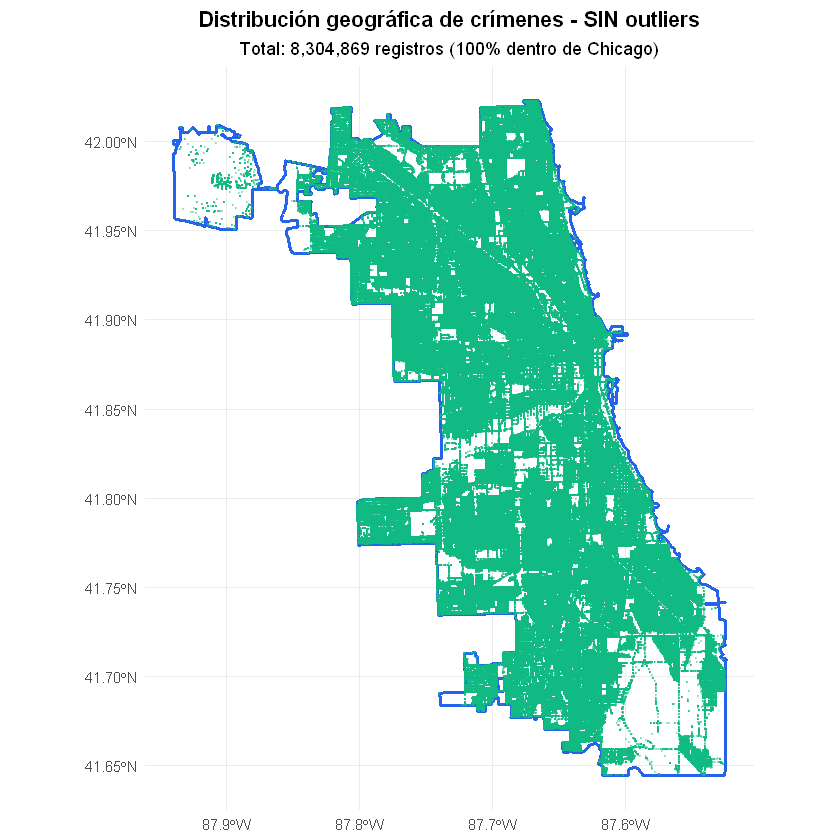

In [57]:
ggplot() +
  geom_sf(data = limites_chicago, fill = NA, color = "#2563eb", size = 1) +
  geom_sf(data = datos_limpios_sf, color = "#10b981", alpha = 0.3, size = 0.1) +
  labs(
    title = "Distribución geográfica de crímenes - SIN outliers",
    subtitle = sprintf("Total: %s registros (100%% dentro de Chicago)", 
                      scales::comma(nrow(datos_limpios_sf)))
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5)
  )

Los outliers geográficos representan coordenadas que se encuentran fuera de los límites oficiales de la ciudad de Chicago según el archivo GeoJSON. Estos puntos pueden deberse a:
- Errores en la captura de coordenadas GPS
- Crímenes reportados incorrectamente fuera de la jurisdicción
- Problemas en la geolocalización de direcciones

Al representar solo el 0.27% del dataset, su eliminación no afecta significativamente el análisis y mejora la calidad de los datos, asegurando que todas las coordenadas correspondan efectivamente a la ciudad de Chicago.

####
<div style="display:inline-flex; align-items:flex-start; gap:12px; background:linear-gradient(90deg,#059669,#10b981); padding:12px; border-radius:8px; box-shadow:0 4px 12px rgba(5,150,105,0.15); color:#fff; max-width:fit-content; width:min(750px,100%); margin:8px auto; margin-left:120px; box-sizing:border-box;">
    <div style="width:24px; height:24px; display:flex; align-items:center; justify-content:center; background:rgba(255,255,255,0.15); border-radius:4px; font-size:1rem; line-height:1;">✅</div>
    <div>
        <div style="font-weight:600; font-size:1rem;">Verificación final del dataset limpio</div>
    </div>
</div>

In [57]:
summary(datos)

     tipo              lugar            arresto        domicilio      
 Length:8304869     Length:8304869     Mode :logical   Mode :logical  
 Class :character   Class :character   FALSE:6205127   FALSE:6864975  
 Mode  :character   Mode  :character   TRUE :2099742   TRUE :1439894  
                                                                      
                                                                      
                                                                      
                                                                      
   distrito              hora             dia                  mes         
 Length:8304869     Min.   : 0.0   Lunes    :1175084   Julio     : 778019  
 Class :character   1st Qu.: 9.0   Martes   :1183466   Agosto    : 768336  
 Mode  :character   Median :14.0   Miércoles:1191645   Mayo      : 739519  
                    Mean   :13.1   Jueves   :1180156   Junio     : 738993  
                    3rd Qu.:19.0   Viernes  :1245681